# **STC: Predicting Watching Hours: A Practical Model for Peak Engagement.**

##**Objective:**
####**Building a simple and easy model that empowers decision-makers to predict the expected number of views for customers in the next two months and identify potential peak times.**


##**Jawwy dataset**
####**The dataset includes total watching hours for customers per day with two columns.**

----------------------------------------------------------------------------------

###**Import the required libraries**

In [154]:
!pip install pyxlsb

In [155]:
import pyxlsb
import pandas as pd
import numpy as np
import seaborn as sns
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline
#plotting and to set the default figure size, respectively.

In [156]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load the Dataset / Explor the Dataset**


In [157]:
df = pd.read_excel("/content/drive/MyDrive/STC/stc TV Data Set_T2 .xlsx", index_col=0)
df.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [158]:
# Rename columns so it'll be more easier
new_column_names = {'date_': 'date', 'Total_watch_time_in_houres': 'duration'}
df.rename(columns=new_column_names, inplace=True)

In [159]:
df.tail()

,date,duration
81,2018-04-24,652.625278
82,2018-04-25,650.428889
83,2018-04-26,675.184444
84,2018-04-27,601.738056
85,2018-04-30,609.281667


In [160]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      86 non-null     datetime64[ns]
 1   duration  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


(86, 2)

In [161]:
df.columns

Index(['date', 'duration'], dtype='object')

In [162]:
df.dtypes

date        datetime64[ns]
duration           float64
dtype: object

In [163]:
#describe the numeric values in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,86.0,780.817926,122.992002,562.124722,707.709653,763.181389,840.985278,1123.551944


In [164]:
df['date'] = pd.to_datetime(df['date'])
date = df['date'].describe()
date

count                      86
unique                     86
top       2018-01-01 00:00:00
freq                        1
first     2018-01-01 00:00:00
last      2018-04-30 00:00:00
Name: date, dtype: object

###**Summary:**
- **The dataset consists of 86 rows and 2 features (columns).**
- **The duration column is shows the Total watch time in houres each date.**
- **The average watch time= 780.82 seconds.**
- **25% of viewers watched for 122.99 seconds or less.**
- **50% of viewers watched for 562.12 seconds or less.**
- **75% of viewers watched for 707.71 seconds or less.**
- **The longest watch time =1123.55 seconds.**
- **The earliest date is 1-1-2018.**
- **The last date is 30-4-2018.**
- **All dates in the dataset appear only once This emphasizes the lack of duplicates.**
- **The "date" feature represents distinct categories such as days, months, or years, and therefore cannot take intermediate values. In contrast, the "Total_watch_time_in_hours" feature is continuous and can take any value within a specific range, including decimals, reflecting the varying lengths of watch time.**

# **Deeper exploration**

In [165]:
#is there any missing values?
if df.isnull().sum().any():
 print("yes")
else:
    print("No")

No


In [166]:
#is there any dupilacted values?
if df.duplicated().any():
    print("yes")
else:
    print("No")

No


In [167]:
# Setting the date as index
df.set_index('date', inplace=True)
# Display the dataframe after setting the date as index
df.head()

,duration
date,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


# **Visualisation**

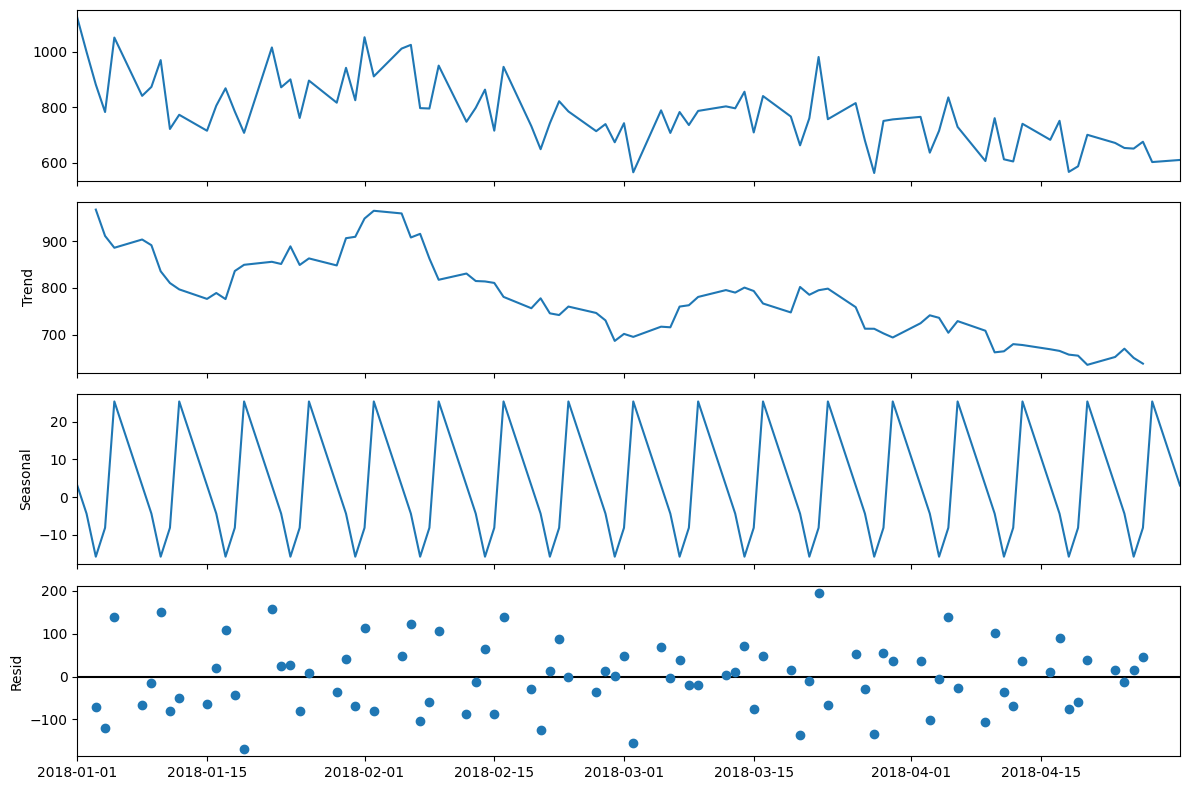

In [168]:

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

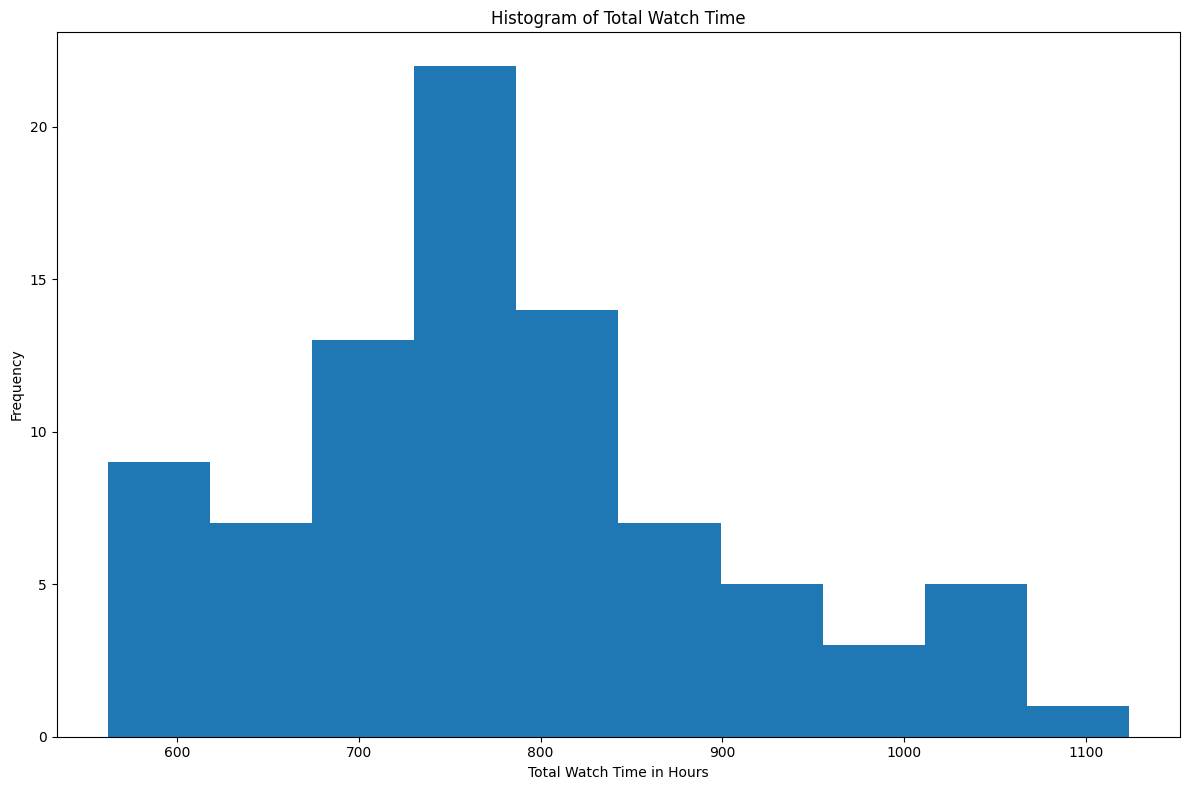

In [169]:
plt.hist(df['duration'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Total Watch Time in Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Total Watch Time')
plt.tight_layout()
plt.show()

In [170]:
# show the dataframe
fig = px.line(df,  y="duration")
fig.show()

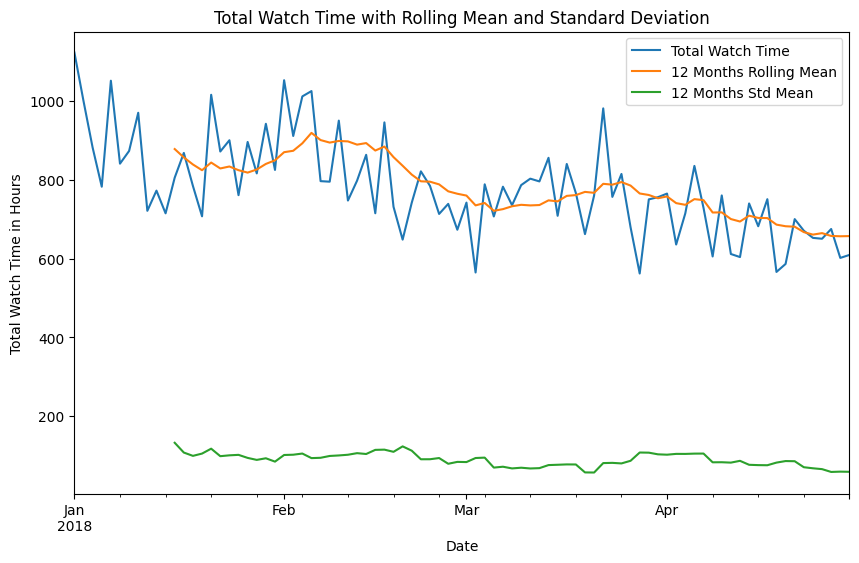

In [171]:
timeseries = df['duration']
rolling_mean = timeseries.rolling(12).mean()
rolling_std = timeseries.rolling(12).std()
plt.figure(figsize=(10, 6))
timeseries.plot(label='Total Watch Time')
rolling_mean.plot(label='12 Months Rolling Mean')
rolling_std.plot(label='12 Months Std Mean')
plt.xlabel('Date')
plt.ylabel('Total Watch Time in Hours')
plt.title('Total Watch Time with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()


 **Using the above data, we notice a sharp drop in viewing time. This has its
reasons, and the most important two reasons are:**

- **Poor customer service**
- **The presence of major competitors such as Shahid and STC TV**

**Therefore, we must:**

- **Improve our customer service and satisfy them to the fullest extent
Provide offers and marketing campaigns**
- **Build a model to predict user behavior**